In [2]:
import pandas as pd
import numpy as np
import numpy.random
import pandas as pd
from astropy.convolution import convolve
import matplotlib.pyplot as plt
from astropy.convolution.kernels import Gaussian2DKernel
import scipy.ndimage as spnd
from matplotlib.colors import LogNorm
from sklearn import preprocessing
import matplotlib as mpl
#from mpl_toolkits.basemap import cm
from matplotlib import colors, ticker
#from mpl_toolkits.basemap import Basemap

%matplotlib inline
#load in whichever bucketed file you want to visualize. To generate more plots, you just need to change the csv and 
#the pollutant in the z = df['bus_diff_PM2.5'] line

In [8]:
df = pd.read_csv('../emissions_diffs/base/base_mxcity1-0.csv')
x = df['x_bucket']
y = df['y_bucket']
z_PM25 = df['PM2.5_base']
z_NOx = df['NOx_base']
z_CO2_Eq = df['CO2-Eq_base']

In [9]:
z_PM25.describe()

count     65784.000000
mean       1898.534439
std        6648.876263
min           0.001002
25%          21.585001
50%         131.842985
75%         935.908852
max      300697.570929
Name: PM2.5_base, dtype: float64

In [14]:
filtered_idx = np.where(z_PM25 < np.percentile(z_PM25, 98))[0]
filtered_small_x_PM25 = x[filtered_idx]
filtered_small_y_PM25 = y[filtered_idx]
filtered_small_z_PM25 = z_PM25[filtered_idx]

filtered_idx = np.where((z_PM25 >= np.percentile(z_PM25, 98)))[0]
filtered_large_x_PM25 = x[filtered_idx]
filtered_large_y_PM25 = y[filtered_idx]
filtered_large_z_PM25 = z_PM25[filtered_idx]

In [11]:
filtered_small_z_PM25.describe()

count    64468.000000
mean      1184.621247
std       2698.625605
min          0.001002
25%         20.778047
50%        123.286445
75%        827.108502
max      18935.392853
Name: PM2.5_base, dtype: float64

In [15]:
filtered_large_z_PM25.describe()

count       329.000000
mean      67430.045994
std       32772.994067
min       41193.465368
25%       47406.505742
50%       55733.374995
75%       76588.973556
max      300697.570929
Name: PM2.5_base, dtype: float64

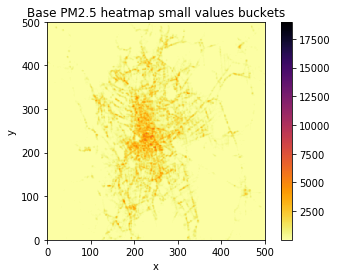

In [21]:
heatmap, xedges, yedges = np.histogram2d(filtered_small_x_PM25, filtered_small_y_PM25, bins=250, weights=(filtered_small_z_PM25))
extent = [yedges[0], yedges[-1], xedges[0], xedges[-1]]

plt.clf()
plt.title('Base PM2.5 heatmap small values buckets')
plt.ylabel('y')
plt.xlabel('x')


im = plt.imshow(convolve(heatmap, Gaussian2DKernel(stddev=1.5)), extent=extent, cmap='inferno_r', vmin=min(filtered_small_z_PM25), vmax=max(filtered_small_z_PM25))
plt.colorbar()
plt.show()

In [72]:
df = pd.read_csv('../emissions_diffs/bus/bus_mxcity1-0.csv')
x = df['x_bucket']
y = df['y_bucket']
z_PM25 = df['bus_diff_PM2.5']*-1+0.01
z_NOx = df['bus_diff_NOx']*-1
z_CO2_Eq = df['bus_diff_CO2-Eq']*-1

filtered_idx = np.where(z_PM25 < np.percentile(z_PM25, 98))[0]
filtered_small_x_PM25 = x[filtered_idx]
filtered_small_y_PM25 = y[filtered_idx]
filtered_small_z_PM25 = z_PM25[filtered_idx]

filtered_idx = np.where((z_PM25 > np.percentile(z_PM25, 40))& (z_PM25 < np.percentile(z_PM25, 50)) )[0]
filtered_large_x_PM25 = x[filtered_idx]
filtered_large_y_PM25 = y[filtered_idx]
filtered_large_z_PM25 = z_PM25[filtered_idx]

In [38]:
z_PM25.describe()

count    65784.000000
mean       490.633516
std       1718.198300
min          0.010150
25%          5.612931
50%         34.276943
75%        242.604677
max      80412.664909
Name: bus_diff_PM2.5, dtype: float64

In [39]:
filtered_small_z_PM25.describe()

count    64468.000000
mean       306.712860
std        697.934282
min          0.010150
25%          5.403043
50%         31.924328
75%        214.490279
max       4871.317544
Name: bus_diff_PM2.5, dtype: float64

In [40]:
filtered_large_z_PM25.describe()

count      987.000000
mean      6873.306217
std       1518.269918
min       4872.277846
25%       5565.018320
50%       6548.228433
75%       7941.699698
max      10517.608116
Name: bus_diff_PM2.5, dtype: float64

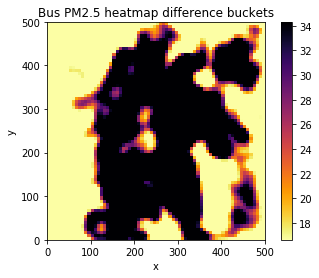

In [73]:
heatmap, xedges, yedges = np.histogram2d(filtered_large_x_PM25, filtered_large_y_PM25, bins=70, weights=(filtered_large_z_PM25))
extent = [yedges[0], yedges[-1], xedges[0], xedges[-1]]

plt.clf()
plt.title('Bus PM2.5 heatmap difference buckets')
plt.ylabel('y')
plt.xlabel('x')


im = plt.imshow(convolve(heatmap, Gaussian2DKernel(stddev=1.5)), extent=extent, cmap='inferno_r', vmin=min(filtered_large_z_PM25), vmax=max(filtered_large_z_PM25))
plt.colorbar()
plt.show()


In [24]:
df = pd.read_csv('../bus_mxcity1-0.csv')
x = df['x_bucket']
y = df['y_bucket']
z_PM25 = df['bus_diff_PM2.5']*-1
z_NOx = df['bus_diff_NOx']*-1
z_CO2_Eq = df['bus_diff_CO2-Eq']*-1

In [25]:
z_PM25.describe()

count    65784.000000
mean         0.258738
std          0.008976
min          0.149652
25%          0.259196
50%          0.261233
75%          0.261924
max          0.305079
Name: bus_diff_PM2.5, dtype: float64

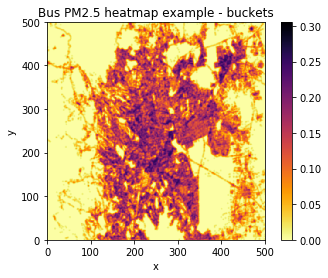

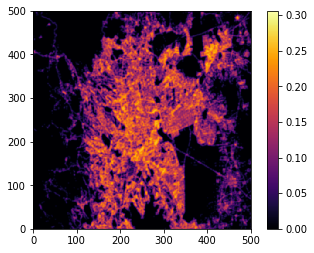

In [27]:
heatmap, xedges, yedges = np.histogram2d(x, y, bins=500, weights=(z_PM25))
extent = [yedges[0], yedges[-1], xedges[0], xedges[-1]]

#fig = plt.figure(figsize=(10,8))
#ax = fig.add_axes([1,1,1,1])

plt.clf()
plt.title('Bus PM2.5 heatmap example - buckets')
plt.ylabel('y')
plt.xlabel('x')


im = plt.imshow(convolve(heatmap, Gaussian2DKernel(stddev=1.5)), extent=extent, cmap='inferno_r', vmin=0, vmax=max(z_PM25))
plt.colorbar()
plt.show()

im = plt.imshow(convolve(heatmap, Gaussian2DKernel(stddev=1.5)), extent=extent, cmap='inferno', vmin=0, vmax=max(z_PM25))
plt.colorbar()
plt.show()

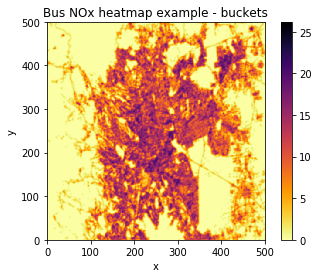

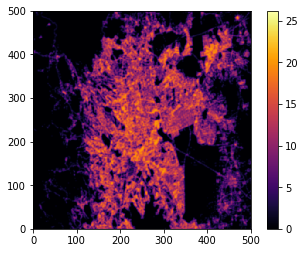

In [42]:
heatmap, xedges, yedges = np.histogram2d(x, y, bins=500, weights=(z_NOx))
extent = [yedges[0], yedges[-1], xedges[0], xedges[-1]]

#fig = plt.figure(figsize=(10,8))
#ax = fig.add_axes([1,1,1,1])

plt.clf()
plt.title('Bus NOx heatmap example - buckets')
plt.ylabel('y')
plt.xlabel('x')

im = plt.imshow(convolve(heatmap, Gaussian2DKernel(stddev=1.5)), extent=extent, cmap='inferno_r', vmin=0, vmax=max(z_NOx))
plt.colorbar()
plt.show()

im = plt.imshow(convolve(heatmap, Gaussian2DKernel(stddev=1.5)), extent=extent, cmap='inferno', vmin=0, vmax=max(z_NOx))
plt.colorbar()
plt.show()

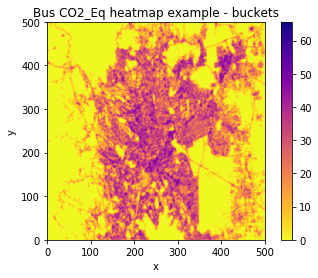

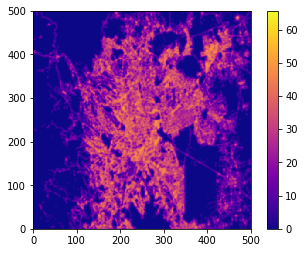

In [72]:
heatmap, xedges, yedges = np.histogram2d(x, y, bins=500, weights=(z_CO2_Eq))
extent = [yedges[0], yedges[-1], xedges[0], xedges[-1]]

#fig = plt.figure(figsize=(10,8))
#ax = fig.add_axes([1,1,1,1])

plt.clf()
plt.title('Bus CO2_Eq heatmap example - buckets')
plt.ylabel('y')
plt.xlabel('x')

im = plt.imshow(convolve(heatmap, Gaussian2DKernel(stddev=1.5)), extent=extent, cmap='plasma_r', vmin=0, vmax=max(z_CO2_Eq))
plt.colorbar()
plt.show()

im = plt.imshow(convolve(heatmap, Gaussian2DKernel(stddev=1.5)), extent=extent, cmap='plasma', vmin=0, vmax=max(z_CO2_Eq))
plt.colorbar()
plt.show()

In [46]:
z_PM25.describe(), z_CO2_Eq.describe(),  z_NOx.describe(), 

(count    65784.000000
 mean        25.873848
 std          0.897637
 min         14.965171
 25%         25.919614
 50%         26.123349
 75%         26.192444
 max         30.507927
 Name: bus_diff_PM2.5, dtype: float64, count    65784.000000
 mean        22.351924
 std          1.545488
 min         12.974120
 25%         22.341592
 50%         22.990869
 75%         23.170134
 max         23.298433
 Name: bus_diff_CO2-Eq, dtype: float64, count    65784.000000
 mean        20.187113
 std          1.481653
 min         10.126230
 25%         20.444767
 50%         20.649593
 75%         20.678755
 max         26.150175
 Name: bus_diff_NOx, dtype: float64)

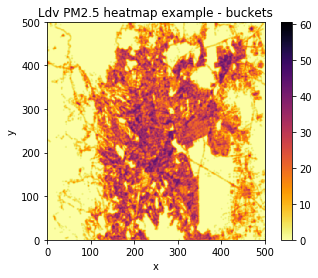

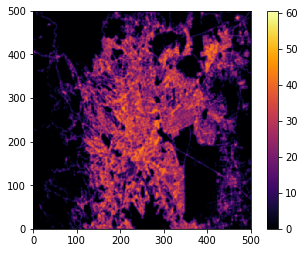

In [47]:
df = pd.read_csv('../ldv_mxcity1-0.csv')
x = df['x_bucket']
y = df['y_bucket']
z_PM25 = df['ldv_diff_PM2.5']*-100
z_NOx = df['ldv_diff_NOx']*-100
z_CO2_Eq = df['ldv_diff_CO2-Eq']*-100

ldv_heatmap, ldv_xedges, ldv_yedges = np.histogram2d(x, y, bins=500, weights=(z_PM25))
ldv_extent = [yedges[0], yedges[-1], xedges[0], xedges[-1]]

#fig = plt.figure(figsize=(10,8))
#ax = fig.add_axes([1,1,1,1])

plt.clf()
plt.title('Ldv PM2.5 heatmap example - buckets')
plt.ylabel('y')
plt.xlabel('x')

im = plt.imshow(convolve(heatmap, Gaussian2DKernel(stddev=1.5)), extent=extent, cmap='inferno_r', vmin=0, vmax=max(z_PM25))
plt.colorbar()
plt.show()

im = plt.imshow(convolve(heatmap, Gaussian2DKernel(stddev=1.5)), extent=extent, cmap='inferno', vmin=0, vmax=max(z_PM25))
plt.colorbar()
plt.show()

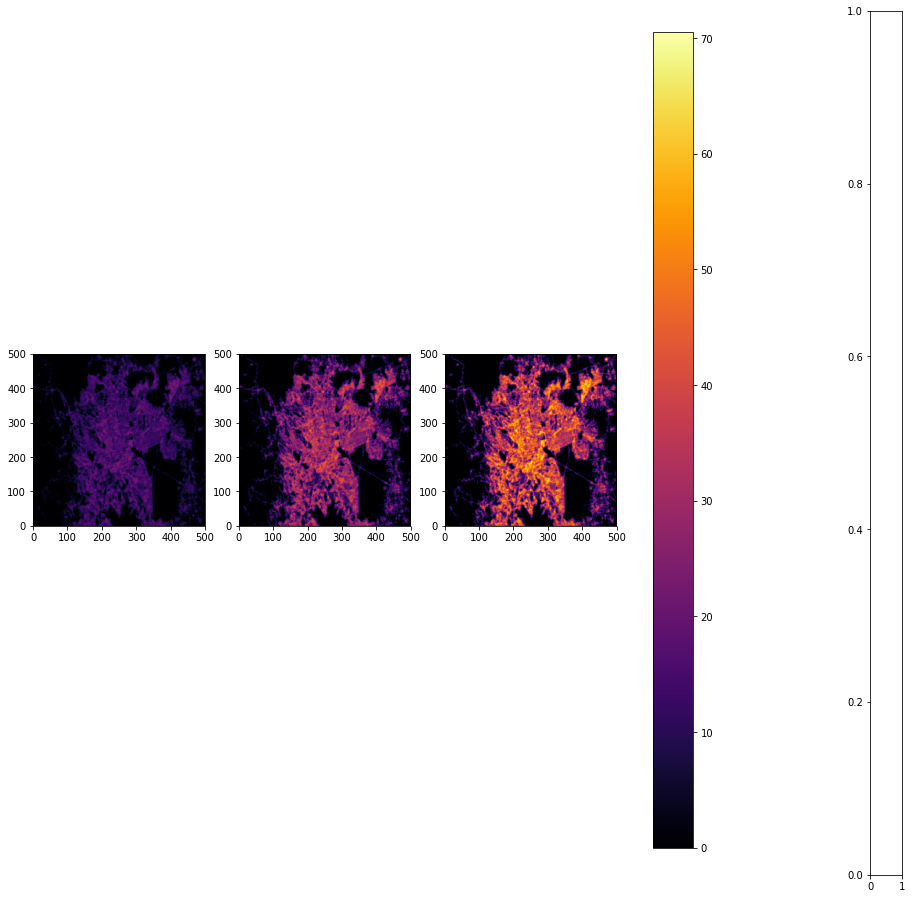

In [77]:
plt.close()
plt.clf()

taxi_df = pd.read_csv('../taxi_mxcity1-0.csv')
taxi_x = taxi_df['x_bucket']
taxi_y = taxi_df['y_bucket']
taxi_z_PM25 = taxi_df['taxi_diff_PM2.5']*-100
taxi_z_NOx = taxi_df['taxi_diff_NOx']*-100
taxi_z_CO2_Eq = taxi_df['taxi_diff_CO2-Eq']*-100
taxi_heatmap, taxi_xedges, taxi_yedges = np.histogram2d(taxi_x, taxi_y, bins=500, weights=(taxi_z_PM25+20))
taxi_extent = [taxi_yedges[0], taxi_yedges[-1], taxi_xedges[0], taxi_xedges[-1]]

bus_df = pd.read_csv('../bus_mxcity1-0.csv')
bus_x = bus_df['x_bucket']
bus_y = bus_df['y_bucket']
bus_z_PM25 = bus_df['bus_diff_PM2.5']*-100
bus_z_NOx = bus_df['bus_diff_NOx']*-100
bus_z_CO2_Eq = bus_df['bus_diff_CO2-Eq']*-100
bus_heatmap, bus_xedges, bus_yedges = np.histogram2d(bus_x, bus_y, bins=500, weights=(bus_z_PM25+20))
bus_extent = [bus_yedges[0], bus_yedges[-1], bus_xedges[0], bus_xedges[-1]]

ldv_df = pd.read_csv('../ldv_mxcity1-0.csv')
ldv_x = ldv_df['x_bucket']
ldv_y = ldv_df['y_bucket']
ldv_z_PM25 = ldv_df['ldv_diff_PM2.5']*-100
ldv_z_NOx = ldv_df['ldv_diff_NOx']*-100
ldv_z_CO2_Eq = ldv_df['ldv_diff_CO2-Eq']*-100

ldv_heatmap, ldv_xedges, ldv_yedges = np.histogram2d(ldv_x, ldv_y, bins=500, weights=(ldv_z_PM25+20))
ldv_extent = [ldv_yedges[0], ldv_yedges[-1], ldv_xedges[0], ldv_xedges[-1]]

fig, axes = plt.subplots(nrows=1, ncols=3)
fig.set_figheight(15)
fig.set_figwidth(15)
im = axes.flat[0].imshow(convolve(taxi_heatmap, Gaussian2DKernel(stddev=1.75)), extent=taxi_extent, cmap='inferno', vmin=0, vmax=(max(ldv_z_PM25)+10))
im = axes.flat[1].imshow(convolve(bus_heatmap, Gaussian2DKernel(stddev=1.75)), extent=bus_extent, cmap='inferno', vmin=0, vmax=(max(ldv_z_PM25)+10))
im = axes.flat[2].imshow(convolve(ldv_heatmap, Gaussian2DKernel(stddev=1.75)), extent=ldv_extent, cmap='inferno', vmin=0, vmax=max(ldv_z_PM25)+10)

cbar_ax = fig.add_axes([0.9, 0.1, 0.03, 0.8])
fig.subplots_adjust(right=0.8)
fig.colorbar(im, ax=axes.ravel().tolist())

plt.show()

In [ ]:
from scipy.interpolate import griddata
grid_z0 = griddata(points, bus_z_PM25, (), method='cubic')

In [69]:
points = np.array([bus_x, bus_y])

array([[  0.,   0.,   0., ..., 499., 499., 499.],
       [ 20., 186., 187., ..., 435., 436., 445.]])

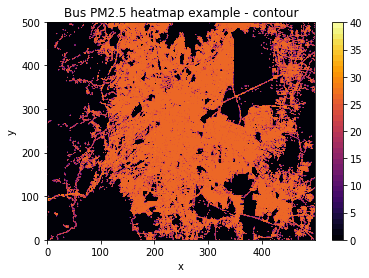

In [37]:

plt.clf()
plt.title('Bus PM2.5 heatmap example - contour')
plt.ylabel('y')
plt.xlabel('x')
heatmap, xedges, yedges = np.histogram2d(x, y, bins=500, weights=(z))
extent = [yedges[0], yedges[-1], xedges[0], xedges[-1]]
data_range = np.arange(0, max(z)+10)
color_levels = data_range


plt.contourf(heatmap, color_levels, cmap='inferno')
plt.colorbar()
#cbar.set_label('amount')
plt.show()

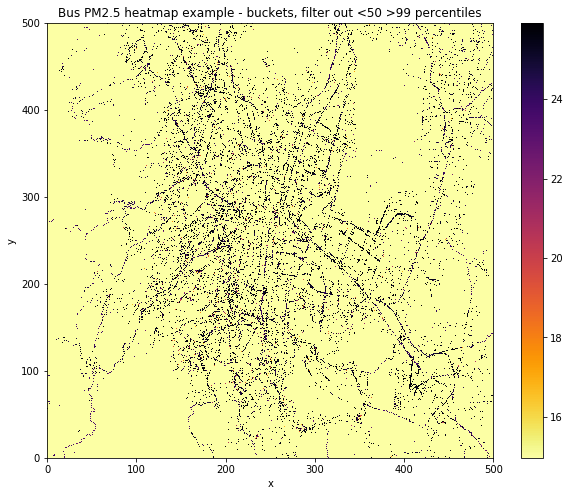

In [86]:
filtered_idx = np.where((bus_z_PM25 > np.percentile(bus_z_PM25,0)) & (bus_z_PM25 < np.percentile(bus_z_PM25, 25)))[0]
filtered_x = x[filtered_idx]
filtered_y = y[filtered_idx]
filtered_z = bus_z_PM25[filtered_idx]

heatmap, xedges, yedges = np.histogram2d(filtered_x, filtered_y, bins=500, weights=filtered_z)
extent = [yedges[0], yedges[-1], xedges[0], xedges[-1]]
fig = plt.figure(figsize=(10,8))
ax = fig.add_axes([1,1,1,1])
plt.clf()
plt.title('Bus PM2.5 heatmap example - buckets, filter out <50 >99 percentiles')
plt.ylabel('y')
plt.xlabel('x')
plt.pcolor(heatmap, cmap='inferno_r', vmin=min(filtered_z), vmax=max(filtered_z))
#plt.imshow(convolve(heatmap, Gaussian2DKernel(stddev=2)), extent=extent, cmap='inferno_r', norm=LogNorm(vmin=min(z)+0.00001, vmax=max(z)))
plt.colorbar()
plt.show()

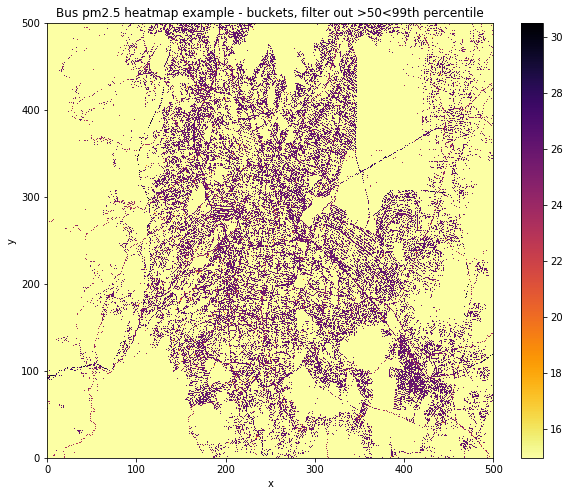

In [20]:
filtered_idx = np.where((z < np.percentile(z,50)) | (z > np.percentile(z, 75)))[0]
filtered_x = x[filtered_idx]
filtered_y = y[filtered_idx]
filtered_z = z[filtered_idx]

heatmap, xedges, yedges = np.histogram2d(filtered_x, filtered_y, bins=500, weights=filtered_z)
extent = [yedges[0], yedges[-1], xedges[0], xedges[-1]]
fig = plt.figure(figsize=(10,8))
ax = fig.add_axes([1,1,1,1])
plt.clf()
plt.title('Bus pm2.5 heatmap example - buckets, filter out >50<99th percentile')
plt.ylabel('y')
plt.xlabel('x')

plt.pcolor(heatmap, cmap='inferno_r', vmin=min(filtered_z), vmax=max(filtered_z))
plt.colorbar()
plt.show()